# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

In [2]:
ds_train, ds_test = tfds.load(name="mnist", split=["train", "test"])

In [3]:
type(ds_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [4]:
len(ds_train)

60000

In [5]:
len(ds_test)

10000

In [6]:
# Reserve 5,000 samples for validation
ds_validation = ds_train.take(5000)
ds_train = ds_train.skip(5000)

In [7]:
len(ds_validation)

5000

In [12]:
def create_dataset(ds):
    images = []
    labels = []
    for features in ds_train.take(-1):
        image, label = features["image"], features["label"]
        image = tf.reshape(image, [1, 784])
        images.append(image)
        labels.append(label)
    # One hot encoding label
    encode_labels = tf.one_hot(labels, depth=10)
    images = tf.cast(images, tf.float32)
    return images, encode_labels

In [13]:
train_images, train_labels = create_dataset(ds_train)
test_images, test_labels = create_dataset(ds_test)
validation_images, validation_labels = create_dataset(ds_validation)

In [14]:
for features in ds_train.take(1):
    image, label = features["image"], features["label"]

### Visualizing the Data

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
image.shape

TensorShape([28, 28, 1])

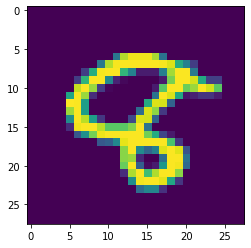

In [17]:
plt.imshow(image)

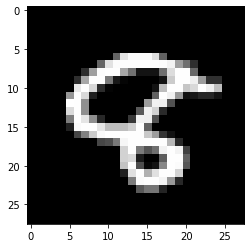

In [18]:
plt.imshow(image, cmap='gist_gray')

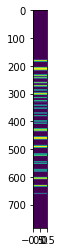

In [19]:
plt.imshow(tf.reshape(image, [784, 1]), aspect=0.02)

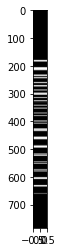

In [20]:
plt.imshow(tf.reshape(image, [784, 1]), cmap='gist_gray', aspect=0.02)

## Create the Model

In [21]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [22]:
b = tf.Variable(tf.zeros([10]))

In [23]:
@tf.function
def forward(x):
    y = tf.matmul(x,W) + b 
    
    return y

### Cross Entropy

In [46]:
@tf.function
def loss():
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))   
    return cross_entropy

In [47]:
optimizer = tf.optimizers.SGD(learning_rate=0.5)

In [48]:
@tf.function
def do_train():
    
    batch = 100
    index = 0
    for i in range(1000):
        
        x = train_images[index:(index+batch)]
        y_true = train_labels[index:(index+batch)]
        for j in range(len(x)):
            y = forward(x)
            optimizer.minimize(loss,[y_true, y])
        index += batch
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(forward(x),1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    acc = optimizer.minimize(loss(x, y_true),[test_images, test_labels])

    print(acc)